In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# EDA ANALYSIS & BUSINESS INTELLIGENCE ANALYSIS 

### Basics

In [2]:
data_original = pd.read_excel("Employees.xlsx")
data_original.head()


,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [3]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No              689 non-null    int64         
 1   First Name      689 non-null    object        
 2   Last Name       689 non-null    object        
 3   Gender          689 non-null    object        
 4   Start Date      689 non-null    datetime64[ns]
 5   Years           689 non-null    int64         
 6   Department      689 non-null    object        
 7   Country         689 non-null    object        
 8   Center          689 non-null    object        
 9   Monthly Salary  689 non-null    int64         
 10  Annual Salary   689 non-null    int64         
 11  Job Rate        689 non-null    float64       
 12  Sick Leaves     689 non-null    int64         
 13  Unpaid Leaves   689 non-null    int64         
 14  Overtime Hours  689 non-null    int64         
dtypes: dat

In [4]:
data_original.isna().sum()

No                0
First Name        0
Last Name         0
Gender            0
Start Date        0
Years             0
Department        0
Country           0
Center            0
Monthly Salary    0
Annual Salary     0
Job Rate          0
Sick Leaves       0
Unpaid Leaves     0
Overtime Hours    0
dtype: int64

In [5]:
data_original.duplicated().sum()

0

In [6]:
color1 = "#1a006e"
color2 = "#ffac26"
backgroundcolor = "#f1f0ff"

### Gender

#### What is the gender distribution of employees in the company?

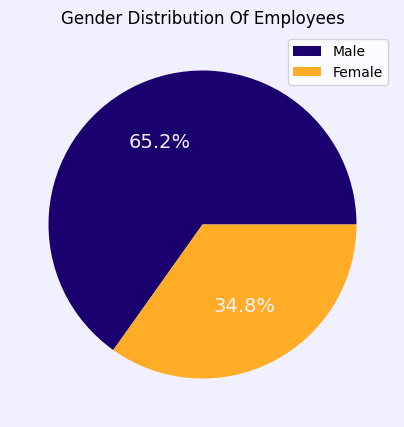

In [7]:
plt.figure(figsize =  (12,5), facecolor =  backgroundcolor)
plt.pie(data_original["Gender"].value_counts(), colors = [color1,color2], autopct = "%1.1f%%", textprops={"fontsize": 14, "color":"#f1f0f7"})
plt.title("Gender Distribution Of Employees")
plt.legend( data_original["Gender"].unique())
plt.show()

#### What is the gender distribution for each department?

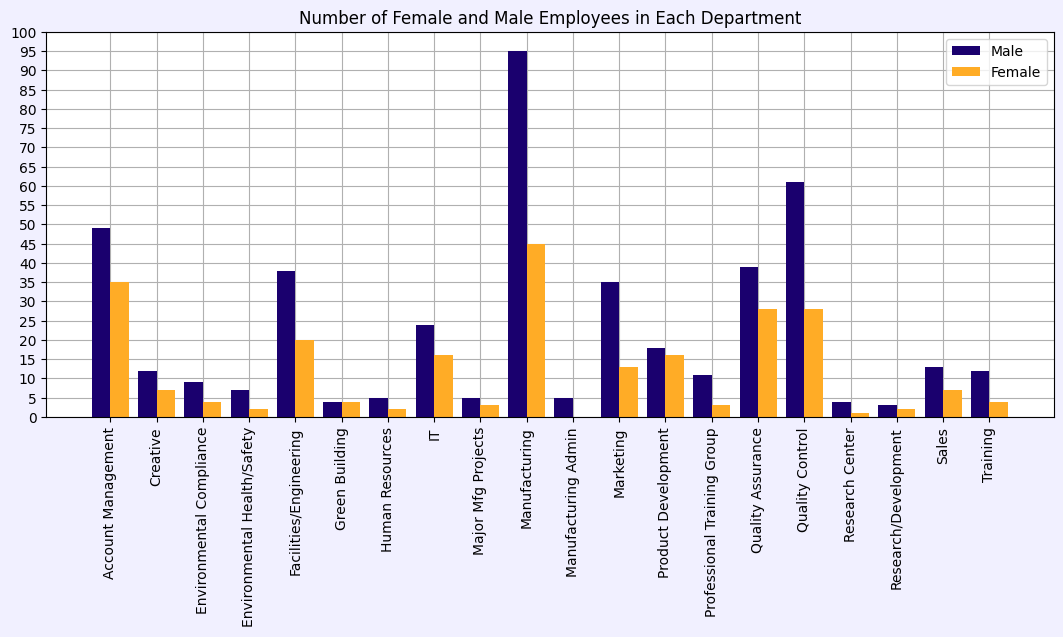

In [8]:
grouped = data_original.groupby(["Department","Gender"]).size().unstack().reset_index()
grouped.columns = ['Department', 'Female', 'Male']

col_width = 0.4
#The same number of index lists as the number of departments
index = np.arange(len(grouped["Department"]))

plt.figure(figsize = (13,5), facecolor = backgroundcolor )
#plt.bar(index(index of col position), values, col width, color)
plt.bar(index, grouped["Male"], col_width, color = color1 )
#plt.bar(index + col width(index of col position + col width (to slide the bar)), values, col width, color)
plt.bar(index + col_width, grouped["Female"], col_width, color = color2)

plt.xticks(index + (col_width/2), grouped["Department"], rotation = 90)
plt.yticks(np.arange(0,101,5))
plt.title("Number of Female and Male Employees in Each Department")
plt.grid()
plt.gca().set_axisbelow(True)
plt.legend(["Male","Female"])
plt.show()


### Salary

#### What is the general salary distribution like?

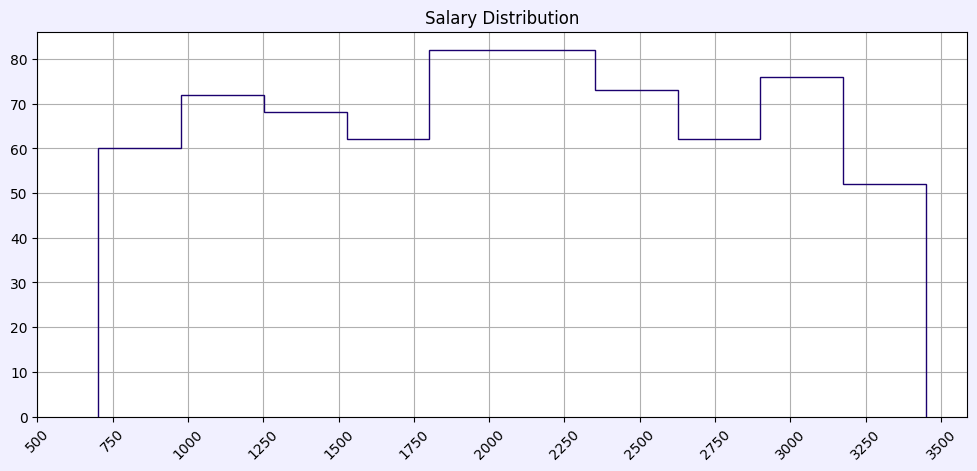

In [9]:
plt.figure(figsize = (12,5), facecolor = backgroundcolor)
plt.hist(data_original["Monthly Salary"], color = color1, histtype = "step")
plt.title("Salary Distribution")
plt.xticks(np.arange(500,3501, 250), rotation = 45)
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

#### What are the annual and monthly salary averages by department?

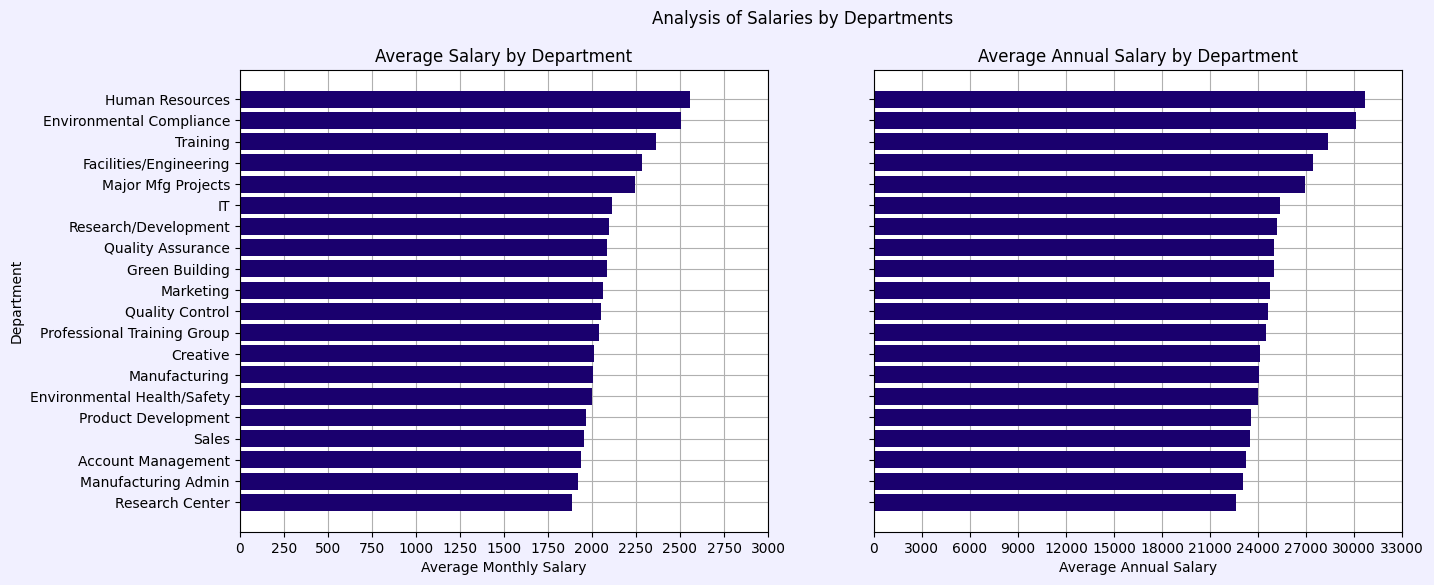

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
average_salary_department = data_original.groupby("Department")["Monthly Salary"].mean().reset_index().sort_values(by = ["Monthly Salary"])
ax[0].barh(average_salary_department["Department"], average_salary_department["Monthly Salary"], color = color1)
ax[0].set_xlabel("Average Monthly Salary")
ax[0].set_ylabel("Department")
ax[0].set_title("Average Salary by Department")
ax[0].set_xticks(np.arange(0, 3001, 250))
ax[0].grid()
ax[0].set_axisbelow(True)

average_annual_salary_department = data_original.groupby("Department")["Annual Salary"].mean().reset_index().sort_values(by = ["Annual Salary"])
ax[1].barh(average_annual_salary_department["Department"], average_annual_salary_department["Annual Salary"], color = color1)
ax[1].set_xlabel("Average Annual Salary")
ax[1].set_title("Average Annual Salary by Department")
ax[1].set_xticks(np.arange(0, 33001, 3000))
ax[1].figure.set_size_inches(15, 6)
ax[1].grid()
ax[1].set_axisbelow(True)
fig.suptitle("Analysis of Salaries by Departments")
fig.set_facecolor(backgroundcolor)

plt.show()

#### What is the comparison of the maximum and average salaries for each department?

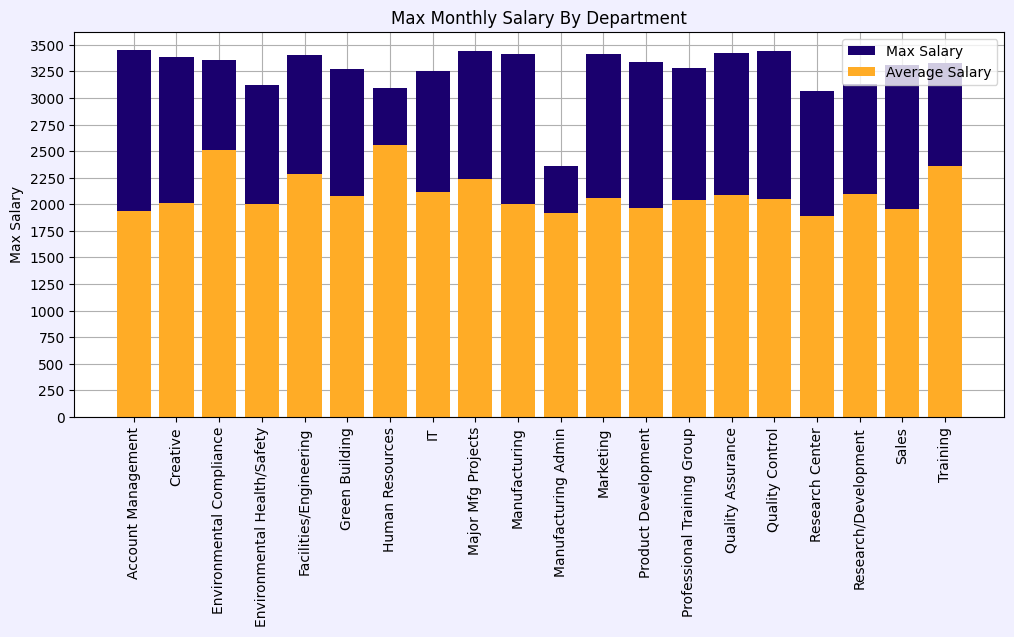

In [11]:
max_salary_monthly = data_original.groupby("Department")["Monthly Salary"].max().reset_index(name = "Max Salary")
average =  data_original.groupby("Department")["Monthly Salary"].mean().reset_index(name = "Average")

col_width = 0.4
index = np.arange(len(grouped["Department"]))

plt.figure(figsize= (12,5), facecolor = backgroundcolor)
plt.bar(index, max_salary_monthly["Max Salary"], color = color1)
plt.bar(index, average["Average"], color = color2)

plt.ylabel("Max Salary")
plt.xticks(index, max_salary_monthly["Department"], rotation = 90)
plt.yticks(np.arange(0,3501,250))

plt.title("Max Monthly Salary By Department")

plt.legend(["Max Salary","Average Salary"])

plt.grid()
plt.gca().set_axisbelow(True)

plt.show()

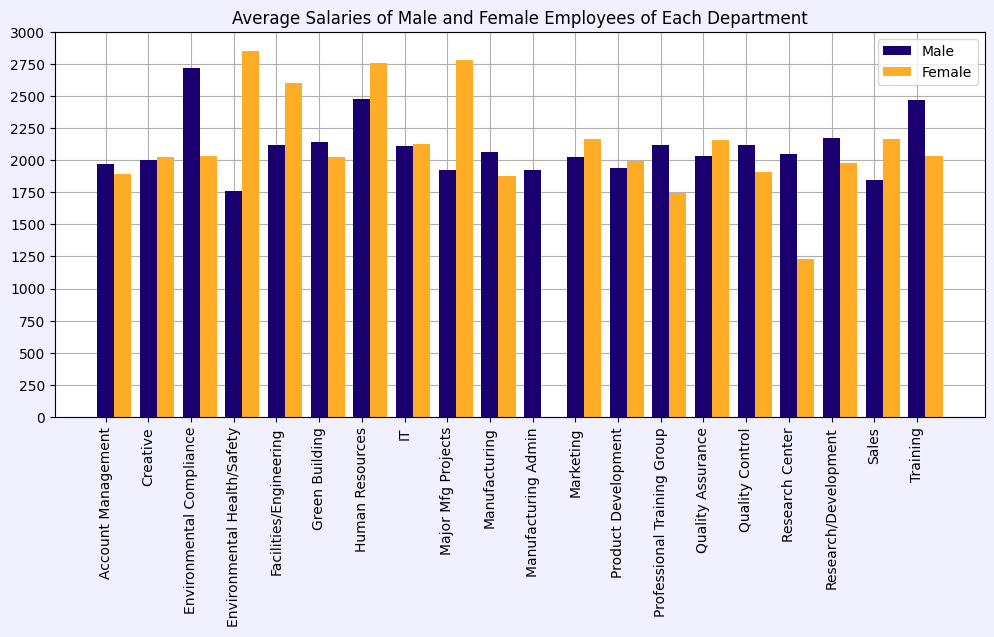

In [12]:
salary_by_gender = data_original.groupby(["Department","Gender"])["Monthly Salary"].mean().unstack().reset_index()
salary_by_gender.columns = ["Department", "Female Average Salary", "Male Average Salary"]

bar_width = 0.4
index = np.arange(len(salary_by_gender["Department"]))

plt.figure(figsize= (12,5), facecolor = backgroundcolor)

plt.bar(index, salary_by_gender["Male Average Salary"], bar_width, color = color1)
plt.bar(index + bar_width, salary_by_gender["Female Average Salary"], bar_width, color = color2)

plt.xticks(index, salary_by_gender["Department"], rotation = 90)
plt.yticks(np.arange(0,3001,250))

plt.title("Average Salaries of Male and Female Employees of Each Department")
plt.legend(["Male","Female"])
plt.grid()
plt.gca().set_axisbelow(True)

plt.show()

### Overtime Hours

#### What is the total number of employees working overtime by department?

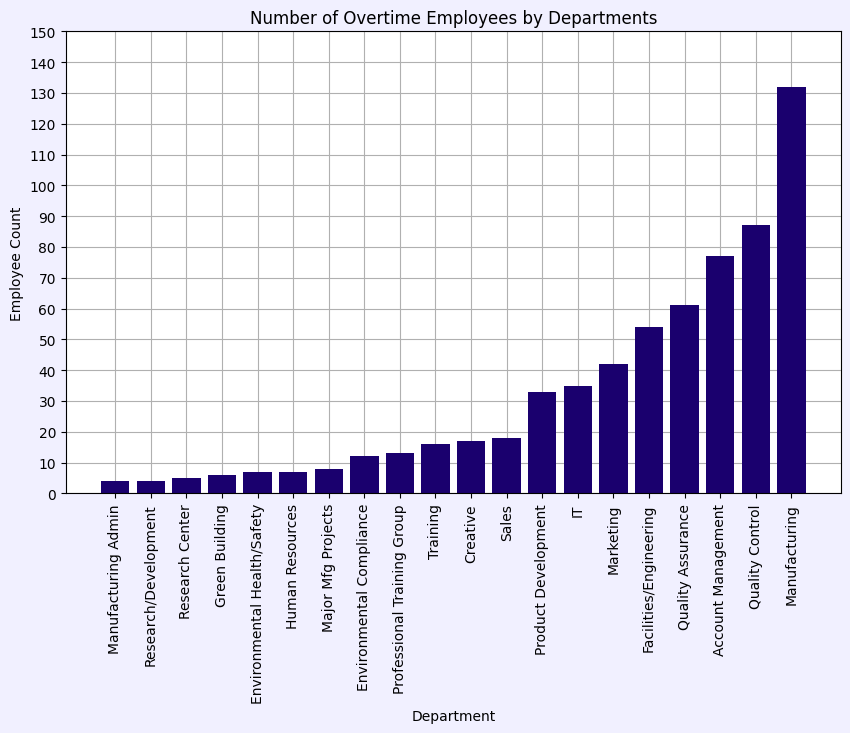

In [13]:
data_filtered = data_original[data_original["Overtime Hours"] != 0]
overtime_employee_count = data_filtered.groupby("Department")["Overtime Hours"].size().reset_index(name = "Employee Count").sort_values(by = "Employee Count")

plt.figure(figsize=(10, 6), facecolor = backgroundcolor)
plt.bar(overtime_employee_count["Department"], overtime_employee_count["Employee Count"], color = color1)
plt.ylabel("Employee Count")
plt.xlabel("Department")
plt.yticks(np.arange(0,151,10))
plt.xticks(rotation = 90)
plt.title("Number of Overtime Employees by Departments")
plt.grid()
plt.gca().set_axisbelow(True)

plt.show()

#### What are the comparisons of average and maximum overtime hours by department?

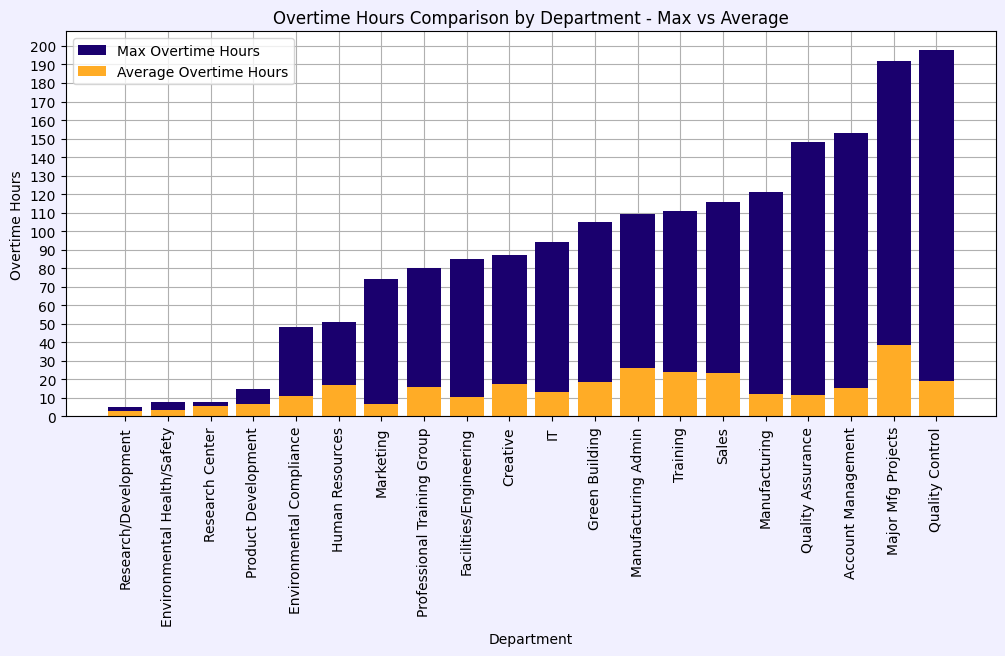

In [14]:
average_overtime = data_original.groupby("Department")["Overtime Hours"].mean().reset_index()
max_overtime = data_original.groupby("Department")["Overtime Hours"].max().reset_index().sort_values(by = "Overtime Hours")

plt.figure(figsize= (12,5), facecolor = backgroundcolor)
plt.bar(max_overtime["Department"], max_overtime["Overtime Hours"], color = color1)
plt.bar(average_overtime["Department"], average_overtime["Overtime Hours"] ,color = color2)
plt.xlabel("Department")
plt.ylabel("Overtime Hours")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,201,10))
plt.title("Overtime Hours Comparison by Department - Max vs Average")
plt.legend(["Max Overtime Hours","Average Overtime Hours"])
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

#### What is the relationship between overtime hours and monthly salary?

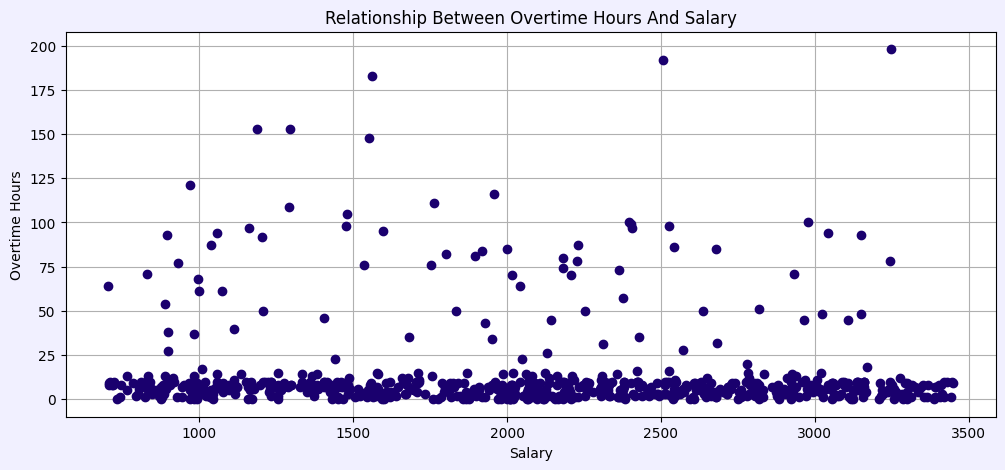

In [15]:
plt.figure(figsize = (12,5), facecolor = backgroundcolor)
plt.scatter(data_original["Monthly Salary"], data_original["Overtime Hours"], color = color1)
plt.xlabel("Salary")
plt.ylabel("Overtime Hours")
plt.title("Relationship Between Overtime Hours And Salary")

plt.grid()
plt.gca().set_axisbelow(True)
plt.show()


### Job Rate

#### What is the average job rate by department?

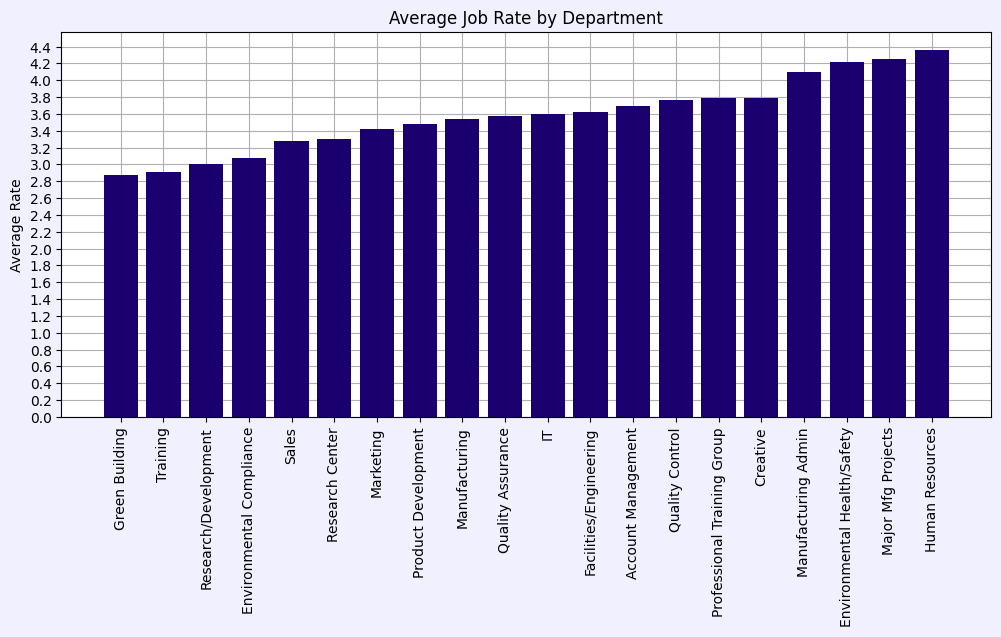

In [16]:
rate = data_original.groupby("Department")["Job Rate"].mean().reset_index().sort_values("Job Rate")

plt.figure(figsize = (12,5), facecolor = backgroundcolor)
plt.bar(rate["Department"], rate["Job Rate"], color = "#1a006e")
plt.ylabel("Average Rate")
plt.title("Average Job Rate by Department")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,4.5,0.2))
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

#### What is the relationship between job rate and monthly salary?

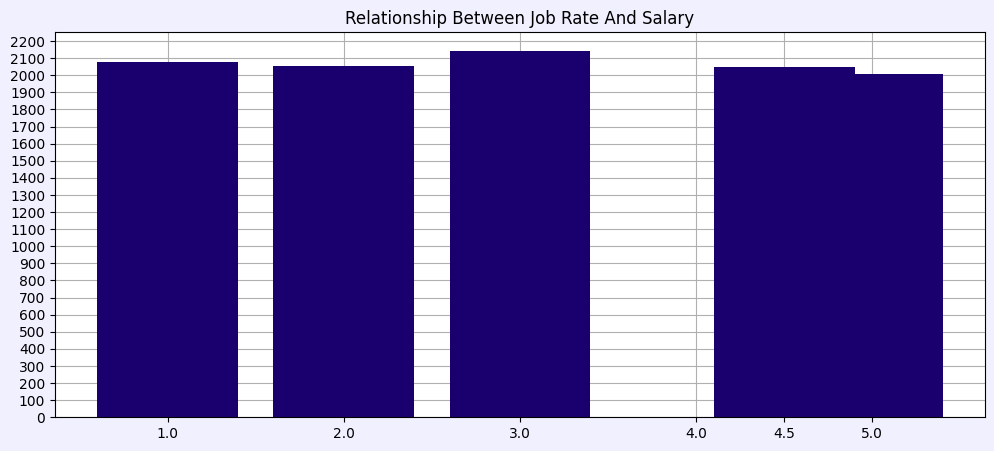

In [17]:
rate = data_original.groupby("Job Rate")["Monthly Salary"].mean().reset_index( name = "Salary")
plt.figure(figsize = (12,5), facecolor = backgroundcolor)
plt.bar(rate["Job Rate"], rate["Salary"], color = color1)
plt.title("Relationship Between Job Rate And Salary")
plt.xticks([1,2,3,4,4.5,5])
plt.yticks(np.arange(0,2201,100))
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

### Country

#### What is the total number of employees by country?

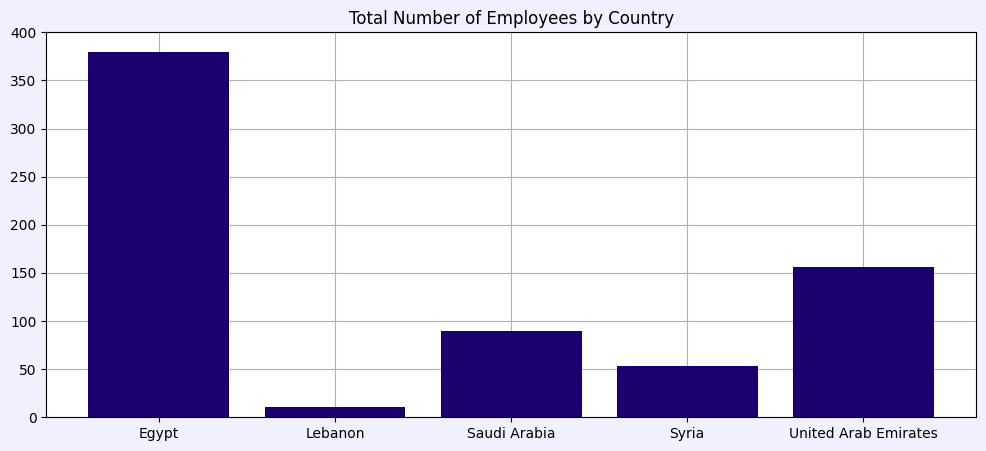

In [18]:
country = data_original.groupby("Country").size().reset_index(name = "Employee Count")

plt.figure(figsize = (12,5), facecolor = backgroundcolor)

plt.bar(country["Country"], country["Employee Count"], color = color1)

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,401,50))
plt.title("Total Number of Employees by Country")
plt.grid()
plt.gca().set_axisbelow(True)

plt.show()

#### What is the distribution of employees by country and department?

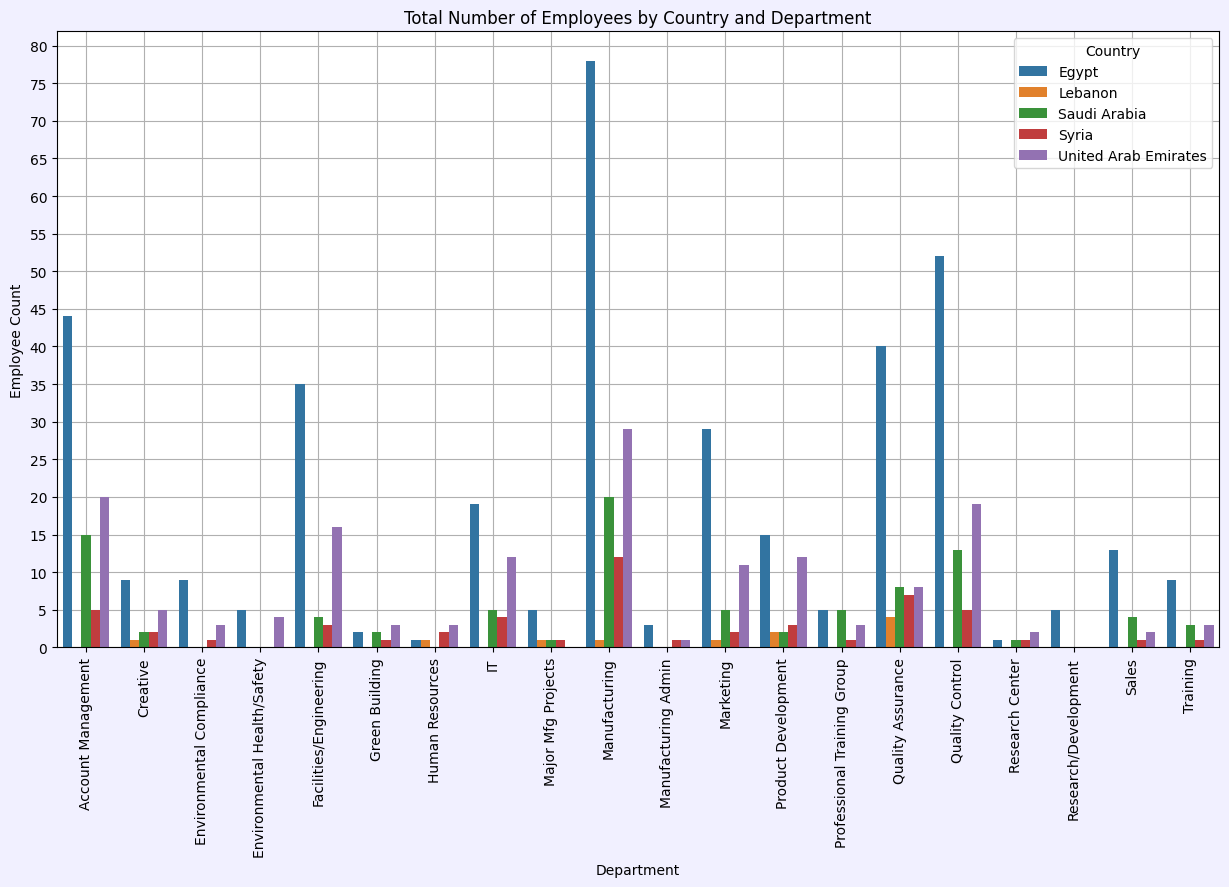

In [19]:
country = data_original.groupby(["Country","Department"]).size().reset_index(name = "Employee Count")

plt.figure(figsize=(15, 8), facecolor = backgroundcolor)
sns.barplot(x = "Department", y = "Employee Count", hue = "Country", data = country)

plt.title("Total Number of Employees by Country and Department")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,81,5))
plt.legend(title = "Country")

plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

#### What is the average salary by country?

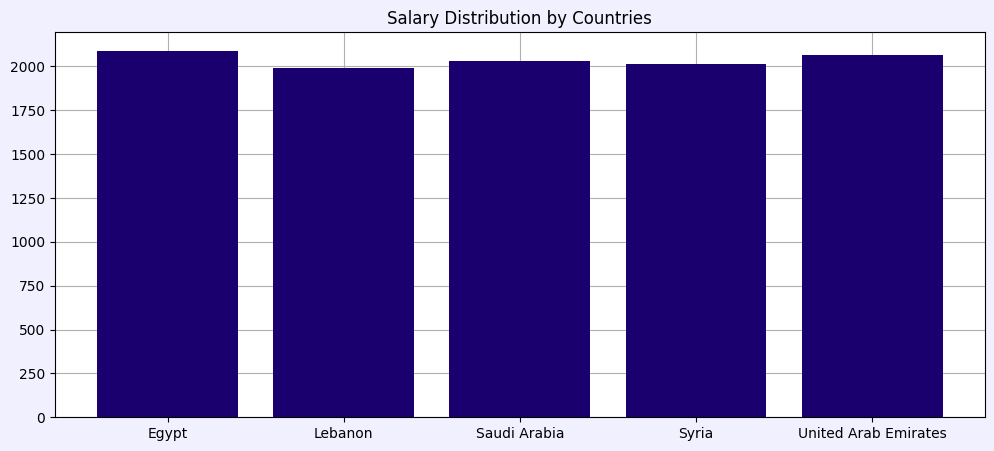

In [20]:
country_salary = data_original.groupby("Country")["Monthly Salary"].mean().reset_index(name = "Salary")

plt.figure(figsize = (12,5), facecolor = backgroundcolor)
plt.bar(country_salary["Country"], country_salary["Salary"], color = color1)
plt.title("Salary Distribution by Countries")
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()


### Years

#### What is the average salary based on employees' years of service?

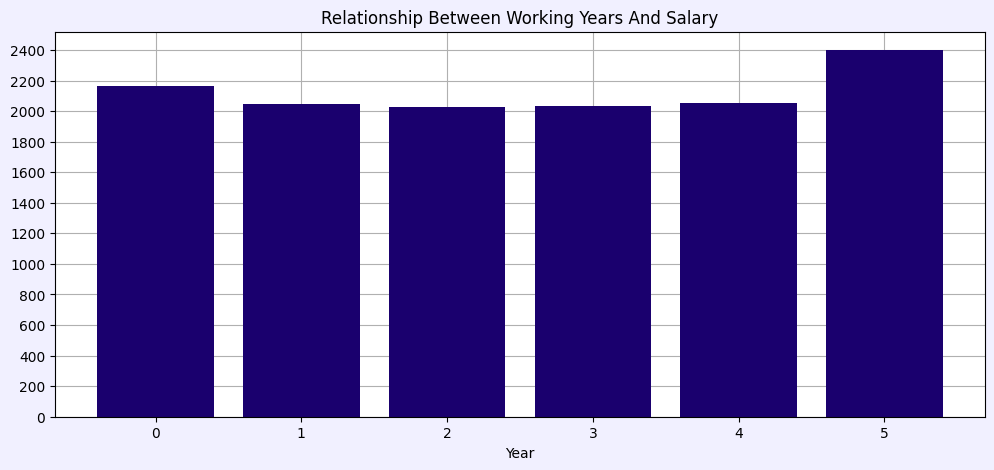

In [21]:
year = data_original.groupby("Years")["Monthly Salary"].mean().reset_index( name = "Salary")
plt.figure(figsize = (12,5), facecolor = backgroundcolor)
plt.bar(year["Years"], year["Salary"], color = color1)
plt.xlabel("Year")
plt.title("Relationship Between Working Years And Salary")
plt.yticks(np.arange(0,2501,200))

plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

#### Timeline of employees who started working by year.

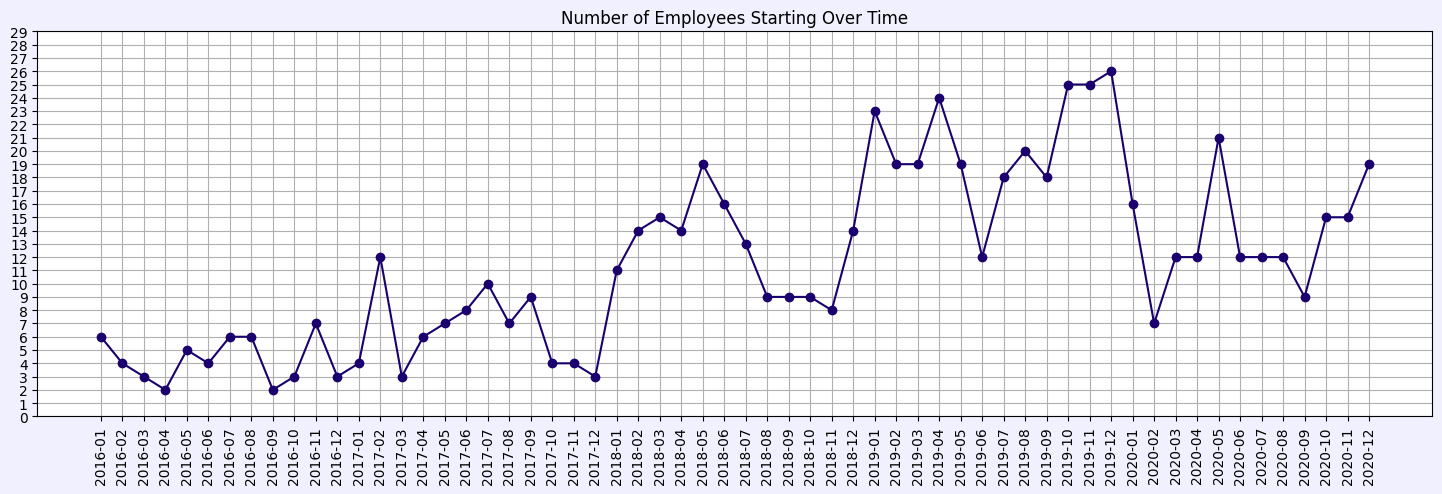

In [22]:
year = data_original.groupby(data_original["Start Date"].dt.to_period("M")).size().reset_index(name = "Employee Count")

plt.figure(figsize = (18,5), facecolor = backgroundcolor)
plt.plot(year["Start Date"].astype(str), year["Employee Count"], color = color1, marker = "o")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,30,1))
plt.title("Number of Employees Starting Over Time")
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

# One-Hot Encoding 

In [23]:
new_df = pd.DataFrame()
new_df =  data_original.drop(["No", "First Name", "Last Name","Start Date"], axis = 1)
categorical_columns = new_df.select_dtypes(include=["object"]).columns.tolist()


one_hot_encoded_data = pd.get_dummies(new_df, columns=categorical_columns, dtype = int )


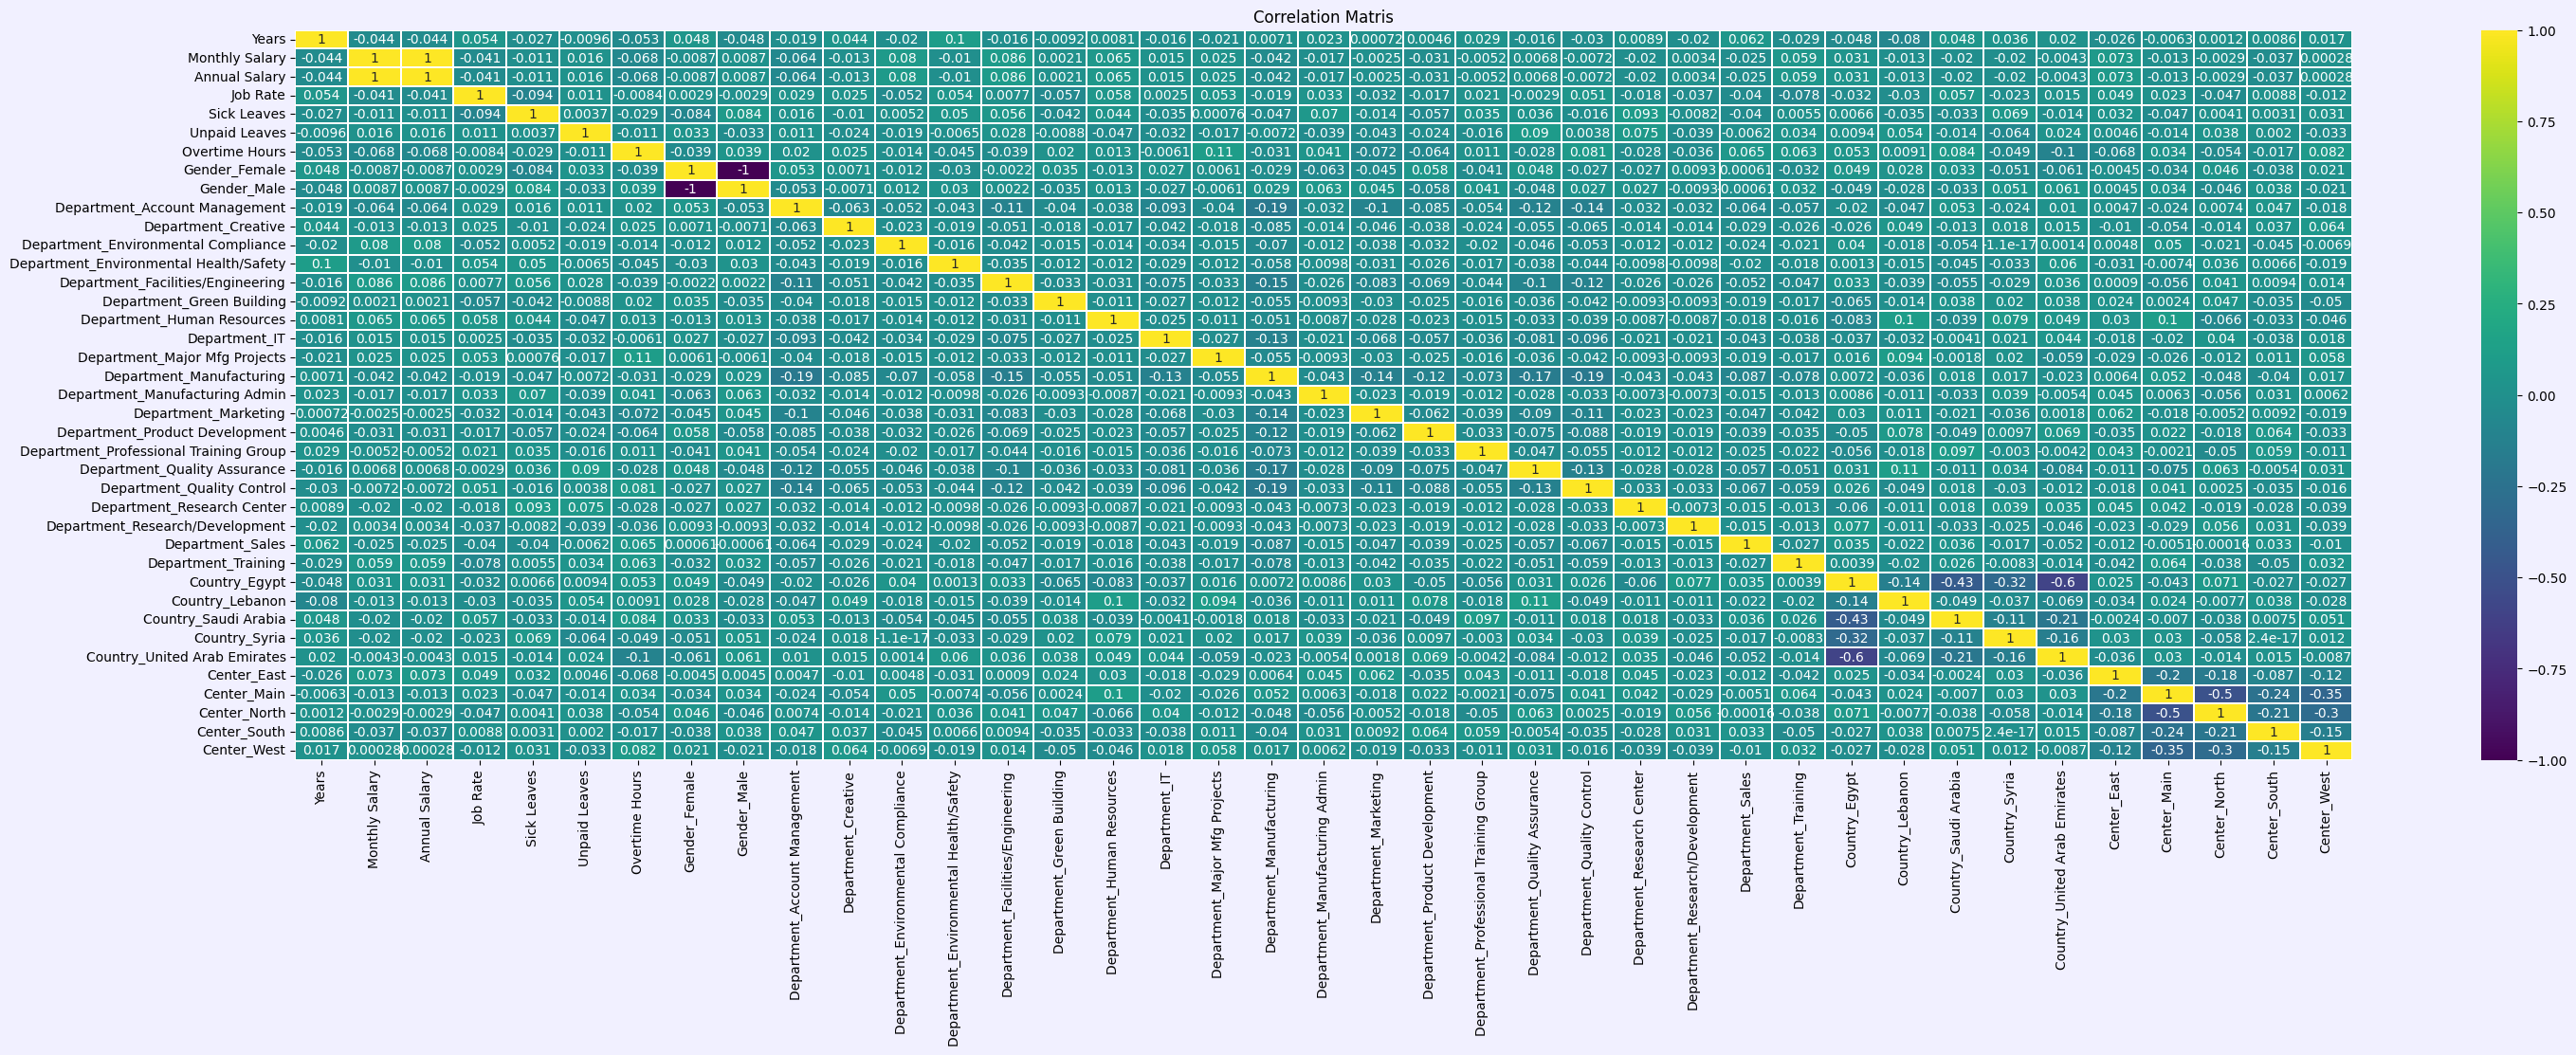

In [24]:
plt.figure(figsize = (35,10), facecolor = backgroundcolor)

correlation_matrix = one_hot_encoded_data.corr()
dataplot = sns.heatmap(correlation_matrix, cmap = "viridis", annot=True, linewidth = 0.2, linecolor = "white")

plt.title("Correlation Matris")
plt.show()

In [25]:
from scipy.stats import skew, kurtosis

skewness_values = one_hot_encoded_data.apply(skew)
kurtosis_values = one_hot_encoded_data.apply(kurtosis)
mean_values = one_hot_encoded_data.mean()
median_values = one_hot_encoded_data.median()
std_dev_values = one_hot_encoded_data.std()
min_values = one_hot_encoded_data.min()
max_values = one_hot_encoded_data.max()

distribution_stats = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values,
    "Std Dev": std_dev_values,
    "Min": min_values,
    "Max": max_values,
    "Skewness": skewness_values,
    "Kurtosis": kurtosis_values
})

distribution_stats


,Mean,Median,Std Dev,Min,Max,Skewness,Kurtosis
Years,1.476052,1.0,1.190963,0.0,5.0,0.614789,-0.390926
Monthly Salary,2068.201742,2077.0,763.289240,703.0,3450.0,0.003231,-1.111761
Annual Salary,24818.420900,24924.0,9159.470878,8436.0,41400.0,0.003231,-1.111761
Job Rate,3.586357,3.0,1.350125,1.0,5.0,-0.495558,-1.003354
Sick Leaves,1.609579,0.0,2.196051,0.0,6.0,1.035581,-0.522127
Unpaid Leaves,0.759071,0.0,1.647764,0.0,6.0,2.050137,2.788537
Overtime Hours,13.702467,7.0,25.692049,0.0,198.0,3.705245,15.655811
Gender_Female,0.348331,0.0,0.476788,0.0,1.0,0.636675,-1.594646
Gender_Male,0.651669,1.0,0.476788,0.0,1.0,-0.636675,-1.594646
Department_Account Management,0.121916,0.0,0.327426,0.0,1.0,2.311109,3.341224


# Test-Train Split

In [26]:
from sklearn.model_selection import train_test_split

X = one_hot_encoded_data.drop(["Monthly Salary", "Annual Salary"], axis = 1)

y = one_hot_encoded_data["Monthly Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 104, test_size = 0.25, shuffle=True) 
  

# Preprocessing

### Yeo Johnson Transformation

In [27]:
from sklearn.preprocessing import PowerTransformer
# Applying the Yeo-Johnson Transformation
def apply_yeo_johnson(X_train, X_test):
    original_columns = X_train.columns 
    
    pt = PowerTransformer(method = "yeo-johnson")
    X_train_transformed = pt.fit_transform(X_train)
    X_test_transformed = pt.transform(X_test)

    X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=original_columns)
    X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=original_columns)
    return X_train_transformed_df, X_test_transformed_df


### Outlier Data limitation

In [28]:
def cap_outliers(X, lower_percentile=0.01, upper_percentile=0.99):
    for column in X.columns:
        lower_limit = X[column].quantile(lower_percentile)
        upper_limit = X[column].quantile(upper_percentile)
        X[column] = X[column].clip(lower=lower_limit, upper=upper_limit)
    return X

In [29]:
#Outliers in the 'X_train' dataset have been addressed by applying limits. 
#Following this, the Yeo-Johnson transformation is applied to both the 'X_train' and 'X_test' datasets to normalize the data and mitigate skewness.

# Applying limiting extreme values only to the training set
X_train = cap_outliers(X_train)

# Applying the Yeo-Johnson Transformation
X_train_transformed, X_test_transformed = apply_yeo_johnson(X_train, X_test)


In [30]:

skewness_values = X_train_transformed.apply(skew)
kurtosis_values = X_train_transformed.apply(kurtosis)
mean_values = X_train_transformed.mean()
median_values = X_train_transformed.median()
std_dev_values = X_train_transformed.std()
min_values = X_train_transformed.min()
max_values = X_train_transformed.max()

distribution_stats = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values,
    "Std Dev": std_dev_values,
    "Min": min_values,
    "Max": max_values,
    "Skewness": skewness_values,
    "Kurtosis": kurtosis_values
})

distribution_stats


,Mean,Median,Std Dev,Min,Max,Skewness,Kurtosis
Years,1.824553e-16,-0.222758,1.00097,-1.468194,1.759039,-0.036111,-0.904172
Job Rate,1.583574e-16,-0.531898,1.00097,-1.716449,1.100696,-0.270122,-1.353167
Sick Leaves,-1.686850e-16,-0.890321,1.00097,-0.890321,1.469045,0.373844,-1.649316
Unpaid Leaves,-6.196594e-17,-0.522767,1.00097,-0.522767,1.986519,1.396643,-0.034675
Overtime Hours,6.196594e-17,0.150533,1.00097,-2.169656,2.352195,-0.022090,0.541922
Gender_Female,7.573614e-17,-0.763428,1.00097,-0.763428,1.309881,0.546454,-1.701388
Gender_Male,-2.685191e-16,0.763428,1.00097,-1.309881,0.763428,-0.546454,-1.701388
Department_Account Management,-4.131062e-17,-0.369546,1.00097,-0.369546,2.706027,2.336481,3.459145
Department_Creative,2.409786e-17,-0.166998,1.00097,-0.166998,5.988083,5.821085,31.885031
Department_Environmental Compliance,6.196594e-17,-0.147588,1.00097,-0.147588,6.775625,6.628037,41.930873


# Feature Selection - Selection of the Most Important Features for Model Training

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


model = LinearRegression()

rfe = RFE(model, n_features_to_select=25)  
fit = rfe.fit(X_train_transformed, y_train)  

print(fit.support_)  
print(fit.ranking_) 

selected_features = np.array(X_train_transformed.columns)[fit.support_]

print("Best Features To Train Model According To RFE (Recursive Feature Elimination): ", selected_features)

[ True  True False False  True  True  True  True  True False False False
  True  True False  True  True False  True  True False  True False False
 False  True False  True  True  True  True  True  True  True  True  True
  True]
[ 1  1 10  8  1  1  1  1  1  9  7  4  1  1  3  1  1  2  1  1  6  1  5 12
 11  1 13  1  1  1  1  1  1  1  1  1  1]
Best Features To Train Model According To RFE (Recursive Feature Elimination):  ['Years' 'Job Rate' 'Overtime Hours' 'Gender_Female' 'Gender_Male'
 'Department_Account Management' 'Department_Creative'
 'Department_Green Building' 'Department_Human Resources'
 'Department_Major Mfg Projects' 'Department_Manufacturing'
 'Department_Marketing' 'Department_Product Development'
 'Department_Quality Assurance' 'Department_Sales' 'Country_Egypt'
 'Country_Lebanon' 'Country_Saudi Arabia' 'Country_Syria'
 'Country_United Arab Emirates' 'Center_East' 'Center_Main' 'Center_North'
 'Center_South' 'Center_West']


In [32]:
X_train_final = X_train_transformed[['Years','Job Rate','Overtime Hours','Gender_Female','Gender_Male','Department_Account Management',
                                     'Department_Creative','Department_Green Building','Department_Human Resources','Department_Major Mfg Projects',
                                     'Department_Manufacturing','Department_Marketing','Department_Product Development','Department_Quality Assurance' ,
                                     'Department_Sales','Country_Egypt','Country_Lebanon','Country_Saudi Arabia','Country_Syria','Country_United Arab Emirates', 
                                     'Center_East','Center_Main','Center_North','Center_South','Center_West']]
X_test_final =  X_test_transformed[['Years','Job Rate','Overtime Hours','Gender_Female','Gender_Male','Department_Account Management',
                                     'Department_Creative','Department_Green Building','Department_Human Resources','Department_Major Mfg Projects',
                                     'Department_Manufacturing','Department_Marketing','Department_Product Development','Department_Quality Assurance' ,
                                     'Department_Sales','Country_Egypt','Country_Lebanon','Country_Saudi Arabia','Country_Syria','Country_United Arab Emirates', 
                                     'Center_East','Center_Main','Center_North','Center_South','Center_West']]

# REGRESSION

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2]
}

# Gradient Boosting model and GridSearch
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring = "neg_mean_squared_error")
gb_grid.fit(X_train_final, y_train)

# Evaluating the best model with test data
gb_best_model = gb_grid.best_estimator_
gb_pred = gb_best_model.predict(X_test_final)

# Gradient Boosting results
gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
print("Gradient Boosting - Best Parameters:", gb_grid.best_params_)
print("Gradient Boosting - MSE for Test Set:", gb_mse)
print("Gradient Boosting - MAE for Test Set:", gb_mae)

Gradient Boosting - Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting - MSE for Test Set: 608156.5221526957
Gradient Boosting - MAE for Test Set: 679.7866012258316


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_params = {
    "n_estimators": [50, 100, 150],
    "max_depth": [10, 20, 30],
    "min_samples_split": [5, 10, 15]
}

# Random Forest model and GridSearch
rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring = "neg_mean_squared_error")
rf_grid.fit(X_train_final, y_train)

# Evaluating the best model with test data
rf_best_model = rf_grid.best_estimator_
rf_pred = rf_best_model.predict(X_test_final)

# Random Forest results
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

print("Random Forest - Best Parameters:", rf_grid.best_params_)
print("Random Forest - MSE for Test Set:", rf_mse)
print("Random Forest - MAE for Test Set:", rf_mae)


Random Forest - Best Parameters: {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 150}
Random Forest - MSE for Test Set: 697365.4167096801
Random Forest - MAE for Test Set: 729.9255662725011


In [38]:
from xgboost import XGBRegressor



xgb_params = {
    "n_estimators": [50, 100, 150, 200],  
    "max_depth": [3, 4, 5, 6, 7, 8],      
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],  
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0] 
}

# XGBoost model and GridSearch
xgb_model = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5, scoring = "neg_mean_squared_error")
xgb_grid.fit(X_train_final, y_train)

# Evaluating the best model with test data
xgb_best_model = xgb_grid.best_estimator_
xgb_pred = xgb_best_model.predict(X_test_final)

# XGBoost results
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

print("XGBoost - Best Parameters:", xgb_grid.best_params_)
print("XGBoost - MSE for Test Set:", xgb_mse)
print("XGBoost - MAE for Test Set:", xgb_mae)

XGBoost - Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
XGBoost - MSE for Test Set: 605470.0902827682
XGBoost - MAE for Test Set: 676.2317480186507
